## **1. Introduction**

In this jupyter notebook I am going to analyze the dataset named Android Permission Dataset from Kaggle. It contains the information of some android apps with their permissions and it clasifies those apps into benign(0) or malware(1).

## **2. Dependences**

Before starting with data analysis, these are the main libraries used:

 - **pandas:** data vector and matrix operations.
 - **matplotlib and seaborn:** graphics generation
 - **sklearn and pycaret:** models, metrics and dataset split.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from pycaret.classification import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

## **3. Data exploration and Preprocessing**

In [2]:
df = pd.read_csv("../data/Android_Permission.csv", header=0, delimiter=',')

In [3]:
print(df.shape)

(29999, 184)


In [4]:
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delet

In [5]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD card c

Let's observe some stadistics about the target attribut, 'Class', being a benign app if Class = 0, and a malware one if Class = 1.

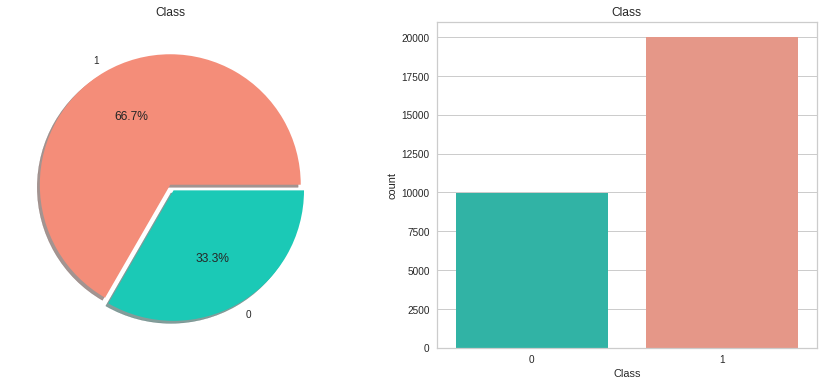

In [6]:
# Class stats: benign(0) or malware(1)

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = df['Class'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax1,shadow=True, colors=['#f48d79',"#1bc9b6"])
ax1.set_title('Class')
ax1.set_ylabel('')

ax2 = sns.countplot('Class',data=df,ax=ax2,palette=['#1bc9b6',"#f48d79"])
ax2.set_title('Class')
plt.show()

About 1/3 of the apps are benign, approximately 10000.

A lot of the columns from 'Safe count permission' (not included) to the end of the data may be eliminated, this is because the majority of its values are 0 or 1 and they are of little use. Therefore, if less than 1000 or  or more than 28999 are '0', the will be eliminated.

In [7]:
dropper = []
for col in df.columns[10:]:
    if (df[col].value_counts()[0] > 28999 or df[col].value_counts()[0] < 1000):
        dropper.append(col)

df = df.drop(df[dropper], axis = 1)

'Related apps' column will be dropped aswell, as it won't be useful for the classificator.

In [8]:
df = df.drop(['Related apps'], axis = 1)

Let's check if there are non-existent values. After checking, only few are found, thus they will sipmly be removed.

In [9]:
print(df.isnull().sum(),'\n')
df = df.dropna()

App                                                                                  1
Package                                                                              0
Category                                                                             0
Description                                                                          3
Rating                                                                               0
Number of ratings                                                                    0
Price                                                                                0
Dangerous permissions count                                                        204
Safe permissions count                                                               0
Hardware controls : control vibrator (S)                                             0
Hardware controls : record audio (D)                                                 0
Hardware controls : take pictures and video

Except 'Category' attribute which it is a simple task to encode, the rest of the text type ones are not useful as they are right now, so they will be transformed into numeric type searching common patterns between malware apps. As for 'Category', it is encoded using Label Encoder from sklearn library.

In [10]:
# encoding Category
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

# patrons columnes tipues text
# nombre de majúscules entre les tres columnes
df['App_Upper'] = df['App'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Pack_Upper'] = df['Package'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))
df['Description_Upper'] = df['Description'].apply(lambda message: sum(1 for c in str(message) if c.isupper()))

# nombre de punts a 'Package'
df['Pack_Periods'] = df['Package'].apply(lambda message: sum(1 for c in str(message) if '.' in c))

# paraules com "free" o "better" en el nom
df['App_Free_Better'] = df['App'].str.contains('free|better').astype(int)


df = df.drop(['App'], axis = 1)
df = df.drop(['Package'], axis = 1)
df = df.drop(['Description'], axis = 1)

With the correlation matrix it can be found if there are correlation between attributes.

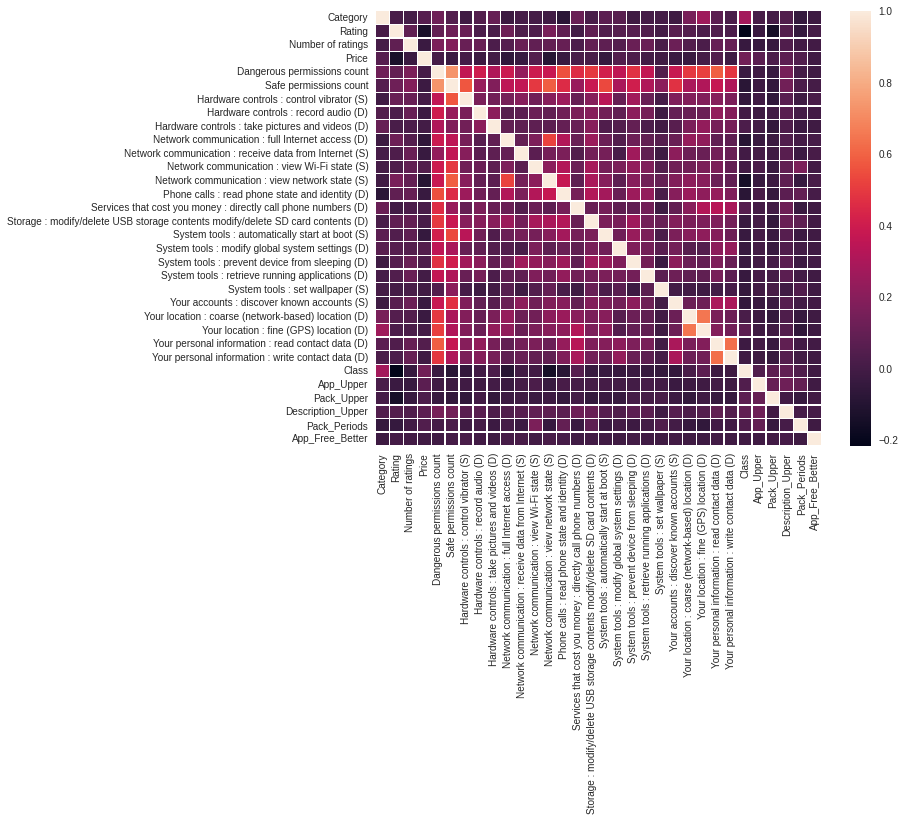

In [11]:
correlacio = df.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(correlacio, linewidths=.2)

It seems there isn't any high correlation between 'Class' and any other attribut. In fact, only 'Dangerous permissions count' and 'Safe permissions count' are correlated.

## **4. Model creation and comparison**

### **Pycaret**

First of all, let's try with normalized data

In [12]:
clf = setup(data = df, target = 'Class', train_size = 0.7, normalize=True, silent=True, session_id = 101)

,Description,Value
0,session_id,101
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29791, 32)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
top3_st = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8166,0.9010,0.8396,0.8785,0.8586,0.5979,0.5992,0.1310
gbc,Gradient Boosting Classifier,0.8080,0.8904,0.8408,0.8660,0.8532,0.5762,0.5768,0.9160
rf,Random Forest Classifier,0.8041,0.8662,0.8525,0.8522,0.8524,0.5613,0.5614,0.7120
ada,Ada Boost Classifier,0.7917,0.8731,0.8345,0.8490,0.8417,0.5373,0.5376,0.2860
et,Extra Trees Classifier,0.7820,0.8030,0.8440,0.8302,0.8370,0.5079,0.5082,0.9340
dt,Decision Tree Classifier,0.7715,0.7435,0.8316,0.8254,0.8285,0.4866,0.4867,0.0660
knn,K Neighbors Classifier,0.7299,0.7916,0.7872,0.8021,0.7945,0.4004,0.4007,2.0560
svm,SVM - Linear Kernel,0.7185,0.0000,0.7636,0.8051,0.7822,0.3827,0.3867,0.1220
lr,Logistic Regression,0.7180,0.7995,0.8084,0.7759,0.7918,0.3554,0.3562,0.8190
lda,Linear Discriminant Analysis,0.6968,0.7550,0.8430,0.7375,0.7867,0.2705,0.2780,0.1590


And now with the original data:

In [14]:
clf = setup(data = df, target = 'Class', train_size = 0.7, silent=True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(29791, 32)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8196,0.9024,0.8461,0.8788,0.8621,0.6017,0.6027,0.1340
gbc,Gradient Boosting Classifier,0.8066,0.8918,0.8407,0.8654,0.8528,0.5712,0.5718,0.9610
rf,Random Forest Classifier,0.8031,0.8646,0.8528,0.8520,0.8524,0.5570,0.5571,0.6970
ada,Ada Boost Classifier,0.7921,0.8742,0.8390,0.8476,0.8432,0.5347,0.5349,0.2900
et,Extra Trees Classifier,0.7792,0.7984,0.8435,0.8284,0.8358,0.4987,0.4990,1.0360
dt,Decision Tree Classifier,0.7738,0.7469,0.8295,0.8308,0.8301,0.4917,0.4918,0.0670
knn,K Neighbors Classifier,0.7308,0.7892,0.7992,0.7973,0.7982,0.3938,0.3938,0.1910
lda,Linear Discriminant Analysis,0.6951,0.7508,0.8479,0.7352,0.7875,0.2573,0.2657,0.1610
ridge,Ridge Classifier,0.6950,0.0000,0.8633,0.7290,0.7905,0.2446,0.2568,0.0300
lr,Logistic Regression,0.6829,0.7212,0.8821,0.7186,0.7867,0.1731,0.1780,0.2010


There is no significant impact on the top classificators when normalazing the data, thus the original one will be used from now on.

In [16]:
for model in top3:
    print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                        

The best 3 models are Light Gradient Boosting Machine with 81.5% Accuracy, followed by Gradient Boosting Classifier with 80,8% Accuracy and lastly Random Forest Classifier with 80,4%. This last one takes 0,7 seconds, for the second one it takes 1 second and as for the best one, only 0,1 seconds aproximately. It is important to notice that the two better ones are both using gradient descent.

Let's observe how are these classifiers working. The order will be from the third place to the better one.

#### Random Forest

In [17]:
rf = top3[2]

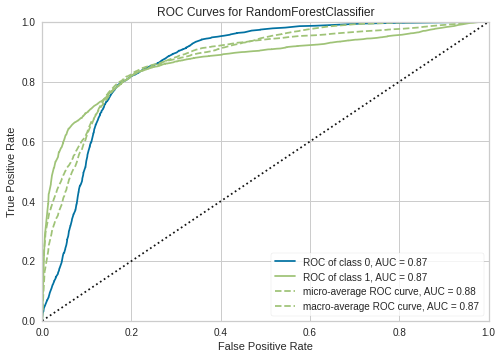

In [18]:
plot_model(rf, 'auc')

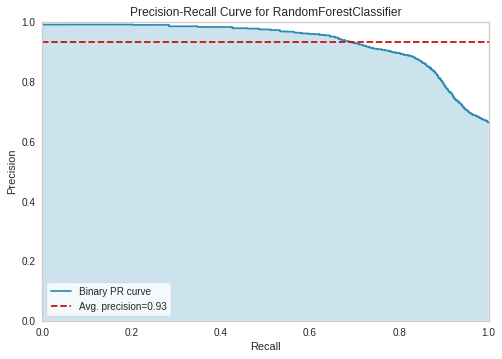

In [19]:
ax1 = plot_model(rf, 'pr')

AUC and precision-recall curves bot are metrics which evaluate the eficiency of the model and the higher the area the better, being 1 the best possible result. The results for this model, aswell as the next ones as it is seen later, are about the 0.9 in all the cases, which is pretty good.

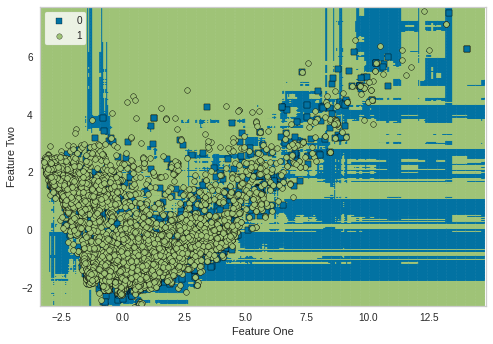

In [20]:
plot_model(rf, 'boundary')

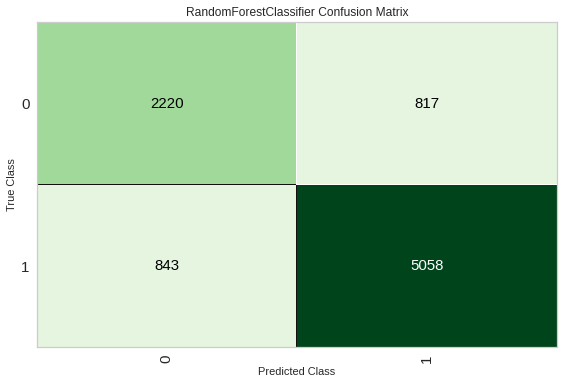

In [21]:
plot_model(rf, 'confusion_matrix')

The confusion matrix shows the correct and incorrect classified samples of both classes (0 and 1). True Class = 0, Predicted Class = 0 shows that 2220 benign apps have been correctly classified; same way, for True Class = 1, Predicted Class = 1, it has classified 5058 malware apps right. True Class = 0, Predicted Class = 1, represents the False Positive, if it is considered Class = 1 (malware) as positive, in other words, 817 benign apps have been wrognly classified as malware. Finally, the rest of apps, are what it is called a False Negative, they are malware but were classified as benign apps. In this model, aswell the next ones, those are good results; obviosly they could be better.

This will do an hiperparameter random search.

In [22]:
rf1 = create_model("rf")
rf1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8111,0.8788,0.8655,0.8532,0.8593,0.5722,0.5723
1,0.7987,0.8519,0.8396,0.8556,0.8475,0.5514,0.5516
2,0.7972,0.8598,0.8554,0.8427,0.8490,0.5405,0.5406
3,0.8120,0.8729,0.8589,0.8589,0.8589,0.5773,0.5773
4,0.7875,0.8503,0.8359,0.8438,0.8398,0.5245,0.5246
5,0.8206,0.8817,0.8611,0.8686,0.8648,0.5984,0.5985
6,0.7923,0.8583,0.8424,0.8455,0.8440,0.5336,0.5336
7,0.7976,0.8590,0.8518,0.8457,0.8487,0.5430,0.5430
8,0.8058,0.8701,0.8525,0.8556,0.8541,0.5637,0.5637
9,0.8086,0.8629,0.8647,0.8507,0.8577,0.5658,0.5660


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

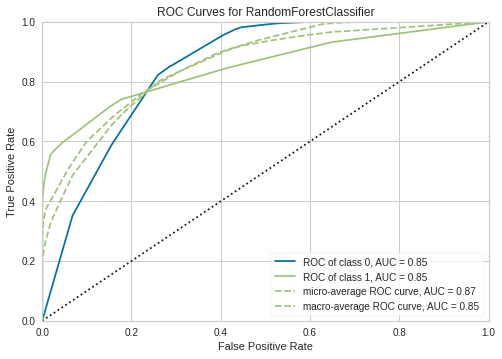

In [23]:
tuned_rf_random = tune_model(rf1)
plot_model(tuned_rf_random)

In [68]:
#save_model(tuned_rf_random, '../models/rf')
tuned_rf_random

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

The hiperparameter random search has been made between the following ranks of parameters.

In [25]:
random_grid = models(internal=True).loc["rf", "Tune Distributions"]
random_grid

{'n_estimators': IntUniformDistribution(lower=10, upper=300, log=False),
 'max_depth': IntUniformDistribution(lower=1, upper=11, log=False),
 'min_impurity_decrease': UniformDistribution(lower=1e-09, upper=0.5, log=True),
 'max_features': UniformDistribution(lower=0.4, upper=1, log=False),
 'min_samples_split': IntUniformDistribution(lower=2, upper=10, log=False),
 'min_samples_leaf': IntUniformDistribution(lower=2, upper=6, log=False),
 'bootstrap': CategoricalDistribution(values=[True, False]),
 'criterion': CategoricalDistribution(values=['gini', 'entropy']),
 'class_weight': CategoricalDistribution(values=['balanced', 'balanced_subsample', {}])}

The following images are a comparision of some of the metrics between the original model and the hiperparameter optimitzed one.

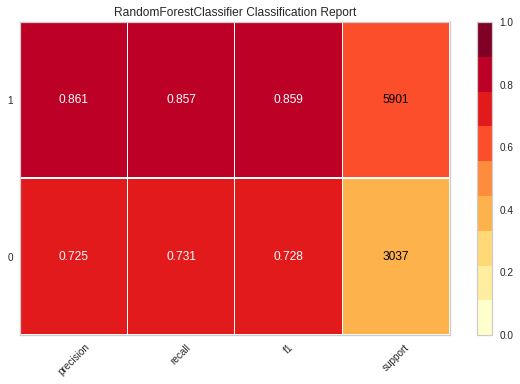

In [26]:
# class report not tuned
plot_model(rf, 'class_report')

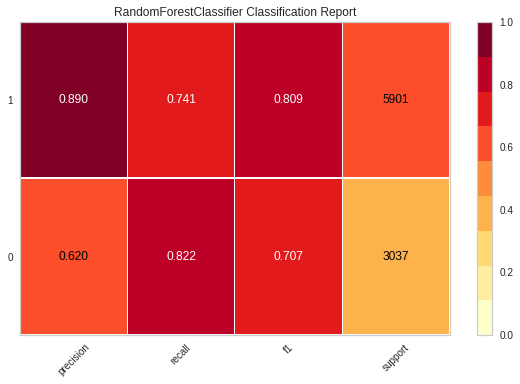

In [27]:
plot_model(tuned_rf_random, 'class_report')

#### Gradient Boosting

In [28]:
gb = top3[1]

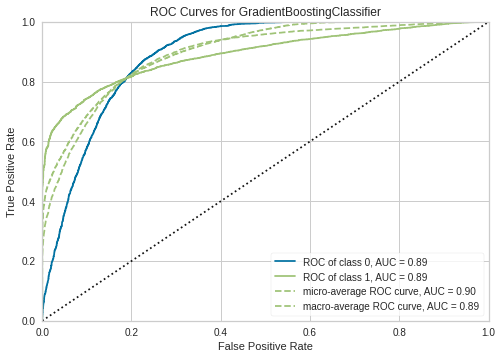

In [29]:
plot_model(gb, 'auc')

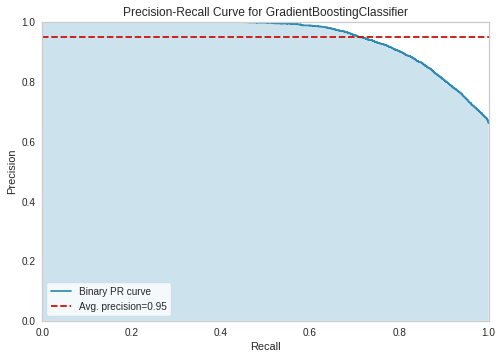

In [30]:
ax1 = plot_model(gb, 'pr')

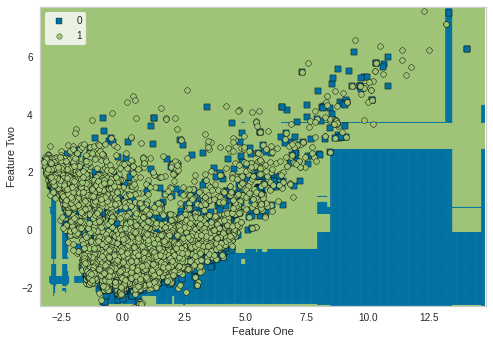

In [31]:
plot_model(gb, 'boundary')

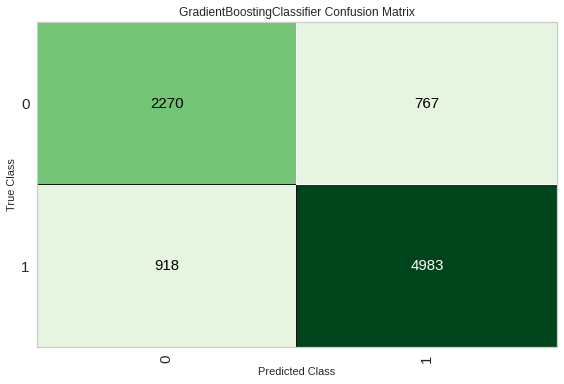

In [32]:
plot_model(gb, 'confusion_matrix')

This will do an hiperparameter random search.

In [33]:
gb1 = create_model("gbc")
gb1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8150,0.8967,0.8475,0.8713,0.8592,0.5894,0.5899
1,0.8006,0.8858,0.8295,0.8656,0.8472,0.5606,0.5617
2,0.8116,0.9002,0.8468,0.8674,0.8569,0.5813,0.5816
3,0.8106,0.8935,0.8452,0.8671,0.8560,0.5793,0.5797
4,0.7914,0.8821,0.8222,0.8586,0.8400,0.5406,0.5417
5,0.8129,0.9012,0.8452,0.8703,0.8576,0.5854,0.5859
6,0.8048,0.8910,0.8453,0.8595,0.8524,0.5644,0.5646
7,0.8038,0.8836,0.8475,0.8567,0.8521,0.5610,0.5611
8,0.8129,0.8947,0.8468,0.8693,0.8579,0.5845,0.5849
9,0.8029,0.8889,0.8309,0.8678,0.8490,0.5657,0.5668


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

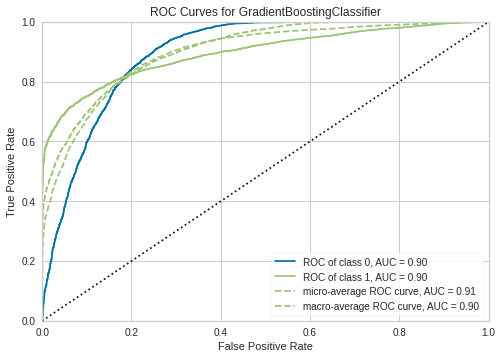

In [34]:
tuned_gb_random = tune_model(gb1)
plot_model(tuned_gb_random)

In [67]:
#save_model(tuned_gb_random, '../models/gb')
tuned_gb_random

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The hiperparameter random search has been made between the following ranks of parameters.

In [36]:
random_grid = models(internal=True).loc["gbc", "Tune Distributions"]
random_grid

{'n_estimators': IntUniformDistribution(lower=10, upper=300, log=False),
 'learning_rate': UniformDistribution(lower=1e-06, upper=0.5, log=True),
 'subsample': UniformDistribution(lower=0.2, upper=1, log=False),
 'min_samples_split': IntUniformDistribution(lower=2, upper=10, log=False),
 'min_samples_leaf': IntUniformDistribution(lower=1, upper=5, log=False),
 'max_depth': IntUniformDistribution(lower=1, upper=11, log=False),
 'min_impurity_decrease': UniformDistribution(lower=1e-09, upper=0.5, log=True),
 'max_features': UniformDistribution(lower=0.4, upper=1, log=False)}

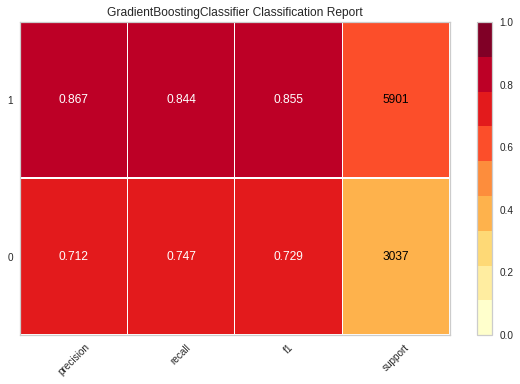

In [37]:
# class report not tuned
plot_model(gb, 'class_report')

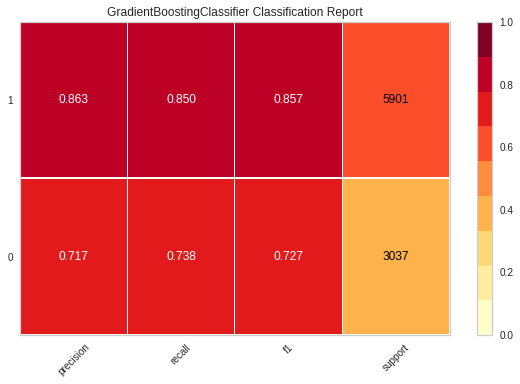

In [38]:
plot_model(tuned_gb_random, 'class_report')

#### Light Gradient Boosting Machine

In [39]:
lgb = top3[0]

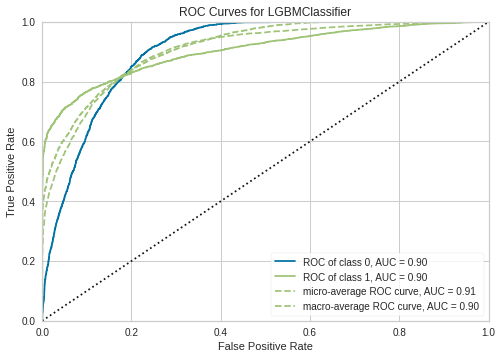

In [40]:
plot_model(lgb, 'auc')

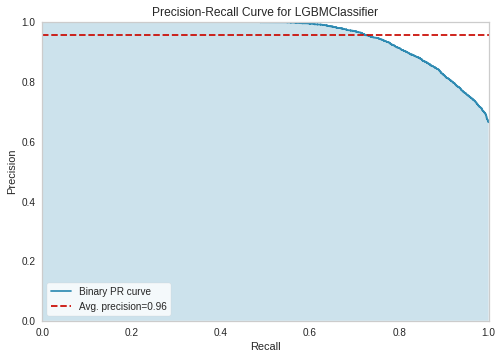

In [41]:
ax1 = plot_model(lgb, 'pr')

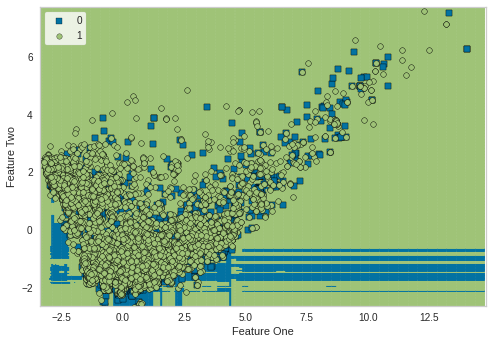

In [42]:
plot_model(lgb, 'boundary')

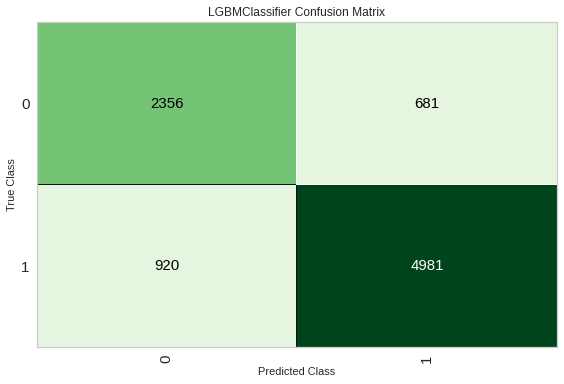

In [43]:
plot_model(lgb, 'confusion_matrix')

This will do an hiperparameter random search.

In [44]:
lgb1 = create_model("lightgbm")
lgb1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8322,0.9071,0.8547,0.8892,0.8716,0.6298,0.6309
1,0.8188,0.9002,0.8424,0.8805,0.8610,0.6011,0.6023
2,0.8260,0.9078,0.8496,0.8846,0.8668,0.6162,0.6173
3,0.8225,0.9054,0.8438,0.8845,0.8637,0.6100,0.6113
4,0.8048,0.8926,0.8287,0.8720,0.8498,0.5717,0.5732
5,0.8249,0.9129,0.8524,0.8810,0.8664,0.6126,0.6133
6,0.8144,0.8967,0.8453,0.8723,0.8586,0.5887,0.5894
7,0.8168,0.8942,0.8489,0.8728,0.8607,0.5933,0.5938
8,0.8235,0.9066,0.8547,0.8774,0.8659,0.6080,0.6084
9,0.8125,0.9002,0.8403,0.8736,0.8566,0.5860,0.5869


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

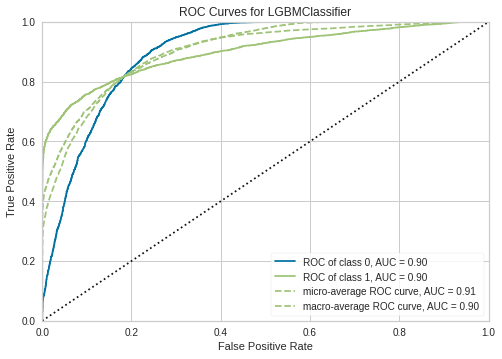

In [45]:
tuned_lgb_random = tune_model(lgb1)
plot_model(tuned_lgb_random)

In [66]:
#save_model(tuned_lgb_random, '../models/lgbm')
tuned_lgb_random

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

The hiperparameter random search has been made between the following ranks of parameters.

In [47]:
random_grid = models(internal=True).loc["lightgbm", "Tune Distributions"]
random_grid

{'num_leaves': IntUniformDistribution(lower=2, upper=256, log=False),
 'learning_rate': UniformDistribution(lower=1e-06, upper=0.5, log=True),
 'n_estimators': IntUniformDistribution(lower=10, upper=300, log=False),
 'min_split_gain': UniformDistribution(lower=0, upper=1, log=False),
 'reg_alpha': UniformDistribution(lower=1e-10, upper=10, log=True),
 'reg_lambda': UniformDistribution(lower=1e-10, upper=10, log=True),
 'feature_fraction': UniformDistribution(lower=0.4, upper=1, log=False),
 'bagging_fraction': UniformDistribution(lower=0.4, upper=1, log=False),
 'bagging_freq': IntUniformDistribution(lower=0, upper=7, log=False),
 'min_child_samples': IntUniformDistribution(lower=1, upper=100, log=False)}

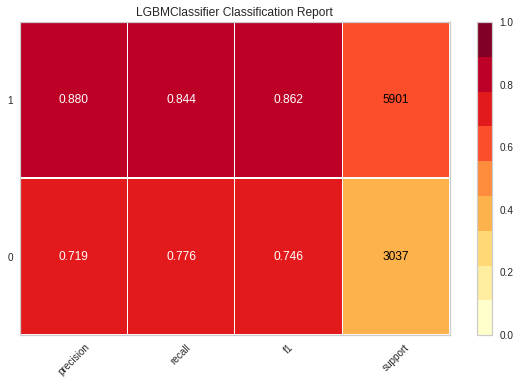

In [48]:
# class report not tuned
plot_model(lgb, 'class_report')

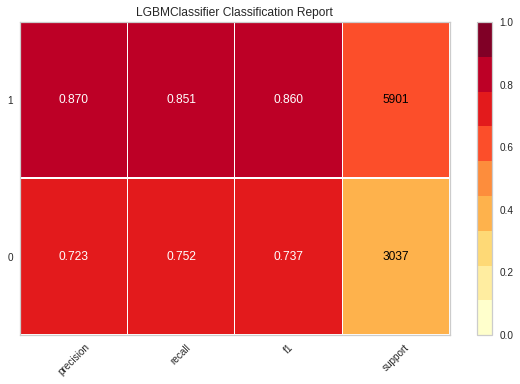

In [49]:
plot_model(tuned_lgb_random, 'class_report')

### **Sklearn**

Let's check with a diferent library, the sklearn.

This will split the target attribute and the train and test data.

In [50]:
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

#### Random Forest

In [51]:
rf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [52]:
y_pred_rf = rf.predict(X_test)


In [53]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1973
           1       0.90      0.75      0.82      3986

    accuracy                           0.77      5959
   macro avg       0.76      0.79      0.76      5959
weighted avg       0.81      0.77      0.78      5959



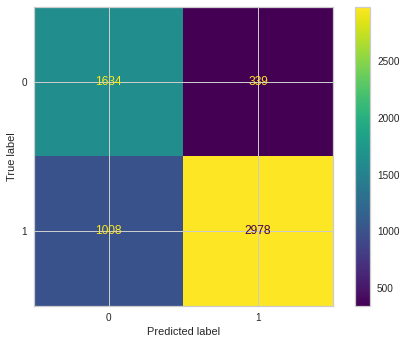

In [54]:
plot_confusion_matrix(rf, X_test, y_test)

#### Gradient Boosting

In [55]:
gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
y_pred_gb = gb.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1973
           1       0.87      0.85      0.86      3986

    accuracy                           0.81      5959
   macro avg       0.79      0.79      0.79      5959
weighted avg       0.81      0.81      0.81      5959



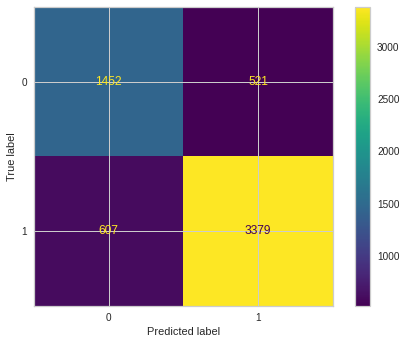

In [58]:
plot_confusion_matrix(gb, X_test, y_test)

In [59]:
X_new = df.drop('Class', axis = 1)
y_new = df['Class']
X_new.columns = [i for i in range(len(X_new.columns))]

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 101)

#### Light Gradient Boosting Machine

In [62]:
lgbm = lgb.LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [63]:
y_pred_lgbm = lgbm.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1973
           1       0.87      0.84      0.86      3986

    accuracy                           0.81      5959
   macro avg       0.79      0.80      0.79      5959
weighted avg       0.82      0.81      0.81      5959



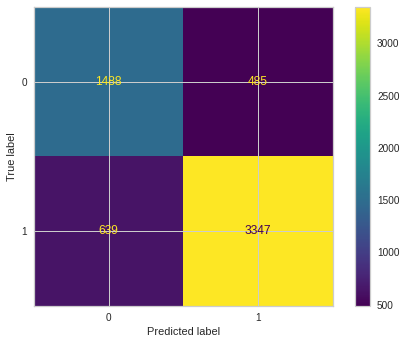

In [65]:
plot_confusion_matrix(lgbm, X_test, y_test)

The results using both libraries are similar, they have the same order of eficiency between them, however, all of them are a few hundredths below the results pycaret produced.

## **5. Conclusion**

After all the analysis and the results obtained, the following conclusions can be exposed:
 - There is no notable relation between attributes and the target 'Class'.
 - There is a higher number of malware apps than benign ones.
 - It has been possible to make different classification models for the dataset.
 - The worst models have been the Quadratic Discriminant Analysis and the SVM - Linear Kernel.
 - The best models have been the ones that impelements the gradient descens classification method.
 - Pycaret has produced better results than sklearn.
 - The best model has an accuracy of an 81%, which is rather acceptable.